In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
# Uploading datasets i.e Customer Acquisition,Spend (Transaction data), Repayment
Cust_Acq = pd.read_csv("E:Datasets/Customer Acqusition.csv",sep=",")
Spend = pd.read_csv("E:Datasets/spend.csv",sep=",")
Rep = pd.read_csv("E:Datasets/Repayment.csv",sep=",")

In [4]:
Cust_Acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
Cust_Acq.shape

(100, 8)

In [6]:
#Dropping unnecessary columns from Cust_Acq dataset
Cust_Acq = Cust_Acq.drop(columns=["No"])

In [7]:
Cust_Acq.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [8]:
Cust_Acq.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [9]:
Spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [10]:
Spend.shape

(1500, 5)

In [11]:
#Dropping unnecessary columns from Spend dataset
Spend = Spend.drop(columns=["Sl No:"])

In [12]:
Spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
Spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [14]:
Rep

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [15]:
Rep.shape

(1523, 5)

In [16]:
Rep.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [17]:
#Dropping unnecessary columns from Repay dataset
Rep = Rep.drop(columns=["SL No:","Unnamed: 4"])

In [18]:
#Dropping null values present in repay dataset
Rep.dropna(inplace=True)

In [19]:
Rep.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [20]:
Rep.head(10)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
5,A1,23-Feb-05,365366.62
6,A1,1-Feb-05,14473.41
7,A8,5-Feb-04,156913.59
8,A9,28-Feb-05,417294.81
9,A10,16-Feb-05,48759.19


In [21]:
Rep.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
### 1. In the above dataset,
#### a. In case age is less than 18, replace it with mean of age values

In [22]:
Mean_age = Cust_Acq["Age"].mean()
print("The mean age of Age column is",Mean_age)

The mean age of Age column is 46.49


In [23]:
#Replacing age less than 18 with mean of age values
Cust_Acq.loc[Cust_Acq["Age"] < 18,"Age"] = Cust_Acq["Age"].mean()

In [24]:
Mean_new = Cust_Acq["Age"].mean()

In [25]:
print("The new mean age of Age column is",Mean_new)

The new mean age of Age column is 48.399399999999986


In [26]:
Cust_Acq.loc[Cust_Acq["Age"] < 18 , "Age"]

Series([], Name: Age, dtype: float64)

In [27]:
print("All customers having age less than are replaced by mean of the age column")

All customers having age less than are replaced by mean of the age column


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [28]:
Cust_Acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [29]:
Spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [30]:
# Merging Cust_Acq and spend datasets on the basis of column "Customer"
Cust_spend = pd.merge(left = Cust_Acq,
                     right = Spend,
                     on = "Customer",
                     how = "inner")
Cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [31]:
# customers having spent amount more than limit given are
Cust_spend[Cust_spend["Amount"]>Cust_spend["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [32]:
#Replacing these Customers spent with 50% of cutomer's limit
Cust_spend.loc[Cust_spend["Amount"]>Cust_spend["Limit"],"Amount"] = (50* Cust_spend["Limit"])/100

In [33]:
#No Customers left whose spend amount is greater than limit
Cust_spend[Cust_spend["Amount"]>Cust_spend["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


In [34]:
Cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13




#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [35]:
Cust_Acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [36]:
Rep.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [37]:
# Merging Cust_Acq and Rep datasets on the basis of column "Customer"
Cust_repay = pd.merge(left = Cust_Acq,
                     right = Rep,
                     on = "Customer",
                     how = "inner")
Cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [38]:
# customers having repayment amount more than limit given are
Cust_repay[Cust_repay["Amount"]>Cust_repay["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,462283.02
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57


In [39]:
# Replacing the amount with the repayment limit given
Cust_repay.loc[Cust_repay["Amount"]>Cust_repay["Limit"],"Amount"] = Cust_repay["Limit"]

In [40]:
#There are no Customers left where repayment amount is more than the limit
Cust_repay[Cust_repay["Amount"]>Cust_repay["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


In [41]:
Cust_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


### 2. From the above dataset create the following summaries:



#### a. How many distinct customers exist?

In [42]:
#Distinct customers are nothing but unique Customers
Distinct_Customers = Cust_Acq["Customer"].nunique()
Distinct_Customers

100

In [43]:
print("There are",Distinct_Customers,"distinct customers exist")

There are 100 distinct customers exist


#### b. How many distinct categories exist?

In [44]:
#Customers from different segments
Distinct_Categories = Cust_Acq["Segment"].value_counts()
Distinct_Categories

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

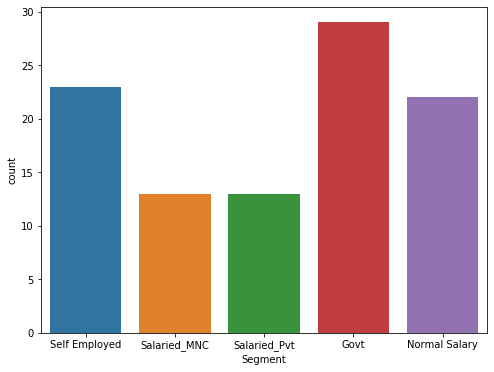

In [45]:
plt.figure(figsize=(8,6))
sns.countplot("Segment" , data = Cust_Acq)
plt.show()

In [46]:
print("We can see from the countplot that number of Distinct categories are",len(Cust_Acq["Segment"].value_counts()))

We can see from the countplot that number of Distinct categories are 5


#### c. What is the average monthly spend by customers?

In [47]:
Spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [48]:
#Changing the datatype of column "MONTH" to pd.to_datetime
Spend["Month"] = pd.to_datetime(Spend["Month"])

In [49]:
Spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [50]:
#Creating new columns "Month" & "Year" to show spent amount in month and year
Spend["Monthly"] = Spend["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
Spend["Yearly"] = Spend["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [51]:
Spend.head(2)

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004


In [52]:
Monthly_spend = round(Spend.groupby(["Yearly","Monthly"]).mean(),2)
Monthly_spend

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.33
       September  158520.09

#### d. What is the average monthly repayment by customers?

In [53]:
Rep.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [54]:
#Changing the datatype of column "MONTH" to pd.to_datetime
Rep["Month"] = pd.to_datetime(Rep["Month"])

In [55]:
Rep.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [56]:
#Creating new columns "Month" & "Year" to show repayment amount in month and year
Rep["Monthly"] = Rep["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
Rep["Yearly"] = Rep["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [57]:
Rep.head(2)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [58]:
Monthly_repayment = round(Rep.groupby(["Yearly","Monthly"]).mean(),2)
Monthly_repayment

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
##### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
##### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [59]:
#Merging all the three datasets. As Cust_Spend is already merged.Now we have to merge repay with it and form a final table Cust_spend_repay
Cust_spend_repay = pd.merge(left = Cust_spend,
                           right = Rep,
                           on = ["Customer"],
                           how = "inner")
Cust_spend_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,2004-01-25,310992.30,January,2004
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,2004-01-12,121874.90,January,2004
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,2004-01-03,337815.57,January,2004
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,2004-01-15,25682.73,January,2004


In [60]:
#Renaming columns according to datasets
Cust_spend_repay = Cust_spend_repay.rename(columns={"Amount_x":"Spend_Amt","Amount_y":"Repay_Amt","Month_x":"Spend_Date","Month_y":"Repay_Date"})

In [61]:
#Grouping the Data based on Yearly and Monthly to get Spend_Amt and Repay_Amt
Total_Amt = Cust_spend_repay.groupby(by=["Yearly","Monthly"])[["Spend_Amt","Repay_Amt"]].sum()
Total_Amt

Spend_Amt     Repay_Amt
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [62]:
#Monthly profit = Monthly Repay - Montly Spend
Total_Amt["Monthly_profit"] = Total_Amt["Repay_Amt"] - Total_Amt["Spend_Amt"]
Total_Amt

Spend_Amt     Repay_Amt  Monthly_profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [63]:
#Rate of interest is 2.9% which is earned on Monthly profit,Now lets calculate the amount earned of 2.9%
Total_Amt["Interest_earned"] = (2.9* Total_Amt["Monthly_profit"])/100
Total_Amt

Spend_Amt     Repay_Amt  Monthly_profit  Interest_earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

#### f. What are the top 5 product types?

In [64]:
Spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [65]:
Spend["Type"].value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

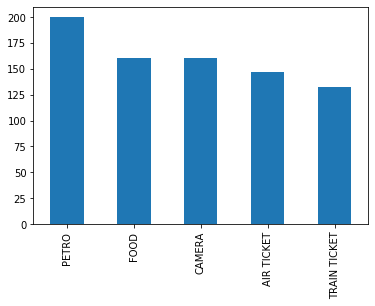

In [66]:
Spend["Type"].value_counts().head(5).plot(kind="bar")
plt.show()

#### g. Which city is having maximum spend?

In [67]:
Cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [68]:
City_spend = Cust_spend.groupby(by=["City"])[["Amount"]].sum().sort_values(by="Amount",ascending = False)
City_spend

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


<Figure size 360x720 with 0 Axes>

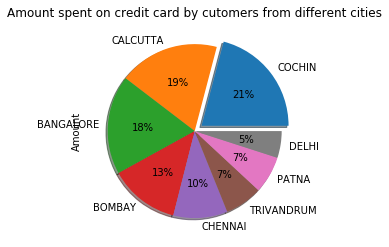

In [69]:
plt.figure(figsize = (5,10))
City_spend.plot(kind="pie",autopct = "%1.0f%%",shadow=True,labeldistance = 1.1, 
                explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],subplots = True,legend=False)
plt.title("Amount spent on credit card by cutomers from different cities")
plt.show()

#### h. Which age group is spending more money?

In [70]:
# Creating a new column Age group with 8 bins and between 18 to 88
Cust_spend["Age_grp"] = pd.cut(Cust_spend["Age"],bins = 8,
                               labels = ["18-26","26-34","34-42","42-50","50-58","58-66","66-74","74-82"],
                               include_lowest=True)
Cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_grp
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,50-58
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,58-66
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,50-58
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,34-42


In [71]:
#Groupind the data based on "Age_grp" and find the amount amount spend by each age group in descending order
Age_spend = Cust_spend.groupby("Age_grp")[["Amount"]].sum().sort_values(by="Amount",ascending=False)

In [72]:
Age_spend.head()

,Amount
Age_grp,
42-50,45314602.81
34-42,37882811.00
26-34,30553459.81
50-58,30361877.71
74-82,26824218.71


<Figure size 360x720 with 0 Axes>

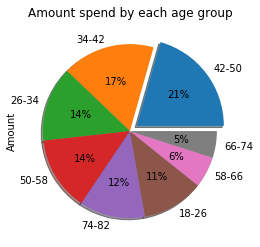

In [73]:
plt.figure(figsize = (5,10))
Age_spend.plot(kind="pie",autopct = "%1.0f%%", shadow = True ,labeldistance = 1.1, 
               explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],subplots = True,legend=False)
plt.title("Amount spend by each age group")
plt.show()

In [74]:
print("From the pie chart we can conclude that Age group 42-50 spending more money")

From the pie chart we can conclude that Age group 42-50 spending more money


#### i. Who are the top 10 customers in terms of repayment?

In [75]:
Cust_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [76]:
#Grouping the data based on customer column to find out top 10 customers
Cust_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [77]:
Cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_grp
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [78]:
#Changing the datatype of column "MONTH" to pd.to_datetime
Cust_spend["Month"] = pd.to_datetime(Cust_spend["Month"])

In [79]:
#Creating new columns "Month" & "Year" to show repayment amount in month and year
Cust_spend["Monthly"] = Cust_spend["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
Cust_spend["Yearly"] = Cust_spend["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [80]:
Cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_grp,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,January,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,58-66,January,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,January,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,January,2004


In [81]:
#We can do this in two ways either from groupby or pivot_table. Selecting pivot_table for clear representation
Cust_spend_pivot = pd.pivot_table(data = Cust_spend,index = ["City","Yearly"],columns="Product",aggfunc="sum",values="Amount")

In [82]:
Cust_spend_pivot

Product                   Gold    Platimum      Silver
City       Yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

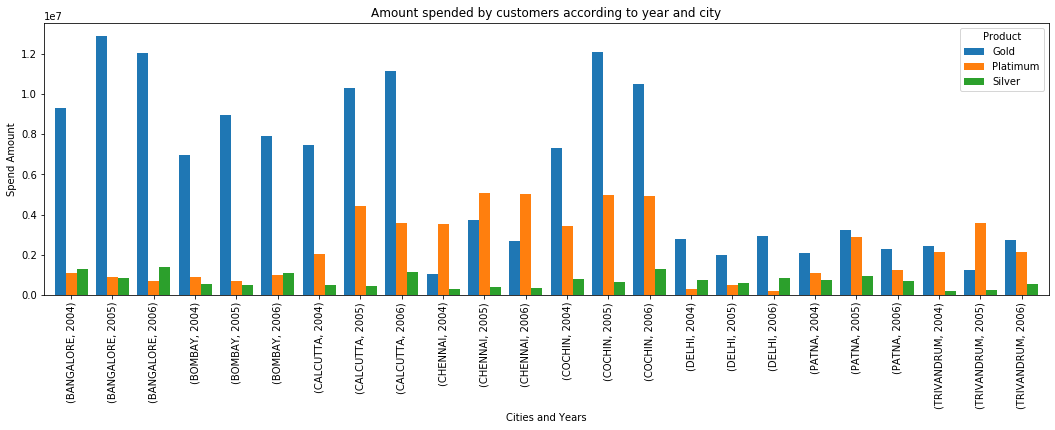

In [83]:
Cust_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.xlabel("Cities and Years")
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

### 4. Create graphs for



#### a. Monthly comparison of total spends, city wise


In [84]:
#We can do this in two ways either from groupby or pivot_table. Selecting pivot_table for clear representation
Cust_spend_monthly = pd.pivot_table(data = Cust_spend,index = ["City"],columns="Monthly",aggfunc="sum",values="Amount")
Cust_spend_monthly

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


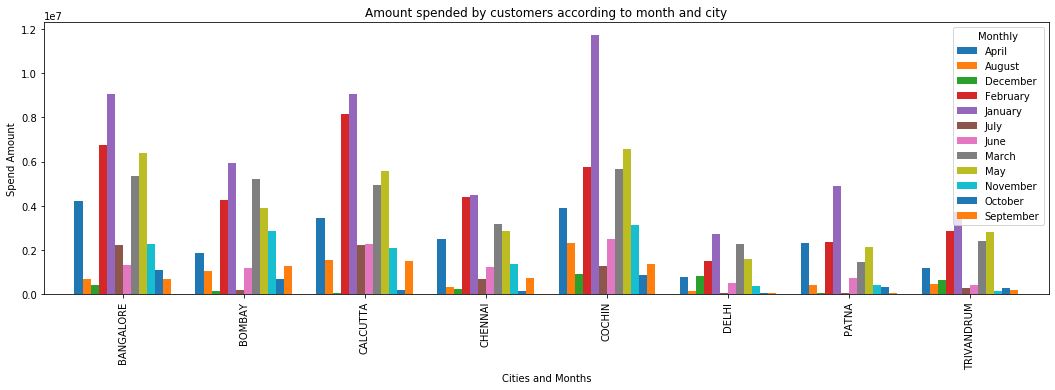

In [85]:
Cust_spend_monthly.plot(kind="bar",figsize=(18,5),width=0.8)
plt.xlabel("Cities and Months")
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to month and city")
plt.show()

#### b. Comparison of yearly spend on air tickets

In [86]:
Cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_grp,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,January,2004


In [87]:
#Grouping the data using groupby so that we can extract Airticket column easily
spend_type= Cust_spend.groupby(["Yearly","Type"])[["Amount"]].sum().reset_index()
spend_type

,Yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [88]:
Air_ticket = spend_type.loc[spend_type["Type"]=="AIR TICKET"]
Air_ticket

,Yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


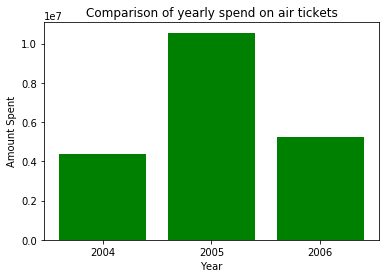

In [89]:
plt.bar(Air_ticket["Yearly"], height = Air_ticket["Amount"], color = "green")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [90]:
Cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_grp,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,January,2004


In [91]:
#Creating a pivot table based on "Monthly" and "Product" columns
product_wise = pd.pivot_table(data = Cust_spend, index = "Product", columns="Monthly",  values = "Amount", aggfunc = "sum")
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


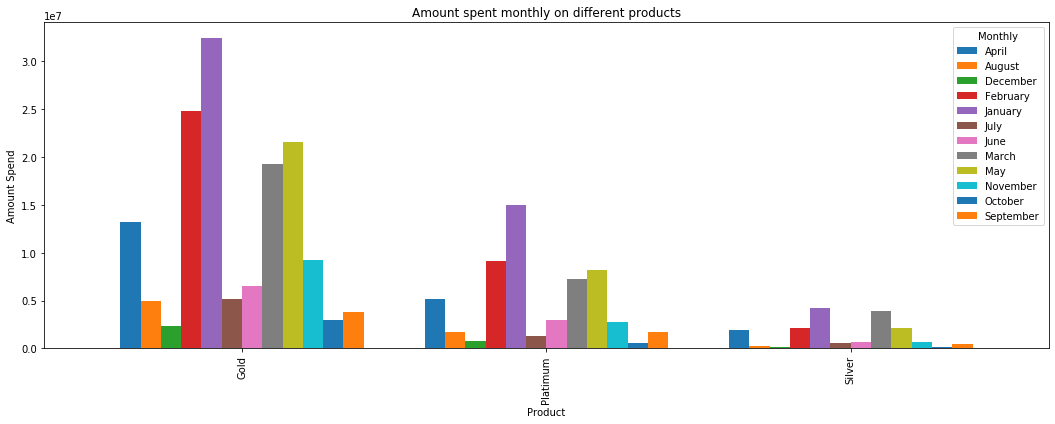

In [92]:
product_wise.plot(kind = "bar",figsize=(18,6),width = 0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

### We can see from above graph that the sales are high for all the products during the months :


- January
- February
- March
- April
- May
### Out of these months , highest sales are in January

### 5. Write user defined PYTHON function to perform the following analysis:

#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers


In [93]:
Cust_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [94]:
#Changing the datatype of column "MONTH" to pd.to_datetime
Cust_repay["Month"] = pd.to_datetime(Cust_repay["Month"])

In [95]:
#Creating new columns "Month" & "Year" to show repayment amount in month and year
Cust_repay["Monthly"] = Cust_repay["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
Cust_repay["Yearly"] = Cust_repay["Month"].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [167]:
def summary_report(Product,timeperiod):
    print("Give the product name and timeperiod for which you want the data")
    if Product.lower()=="gold" and timeperiod.lower()=="monthly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Monthly",aggfunc="sum",values="Amount")
        result = pivot.loc[("Gold",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]
    elif Product.lower()=="gold" and timeperiod.lower()=="yearly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Yearly",aggfunc="sum",values="Amount")
        result = pivot.loc[("Gold",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]
    elif Product.lower()=="silver" and timeperiod.lower()=="monthly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Monthly",aggfunc="sum",values="Amount")
        result = pivot.loc[("silver",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]
    elif Product.lower()=="silver" and timeperiod.lower()=="yearly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Yearly",aggfunc="sum",values="Amount")
        result = pivot.loc[("Gold",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]
    elif Product.lower()=="platinum" and timeperiod.lower()=="monthly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Monthly",aggfunc="sum",values="Amount")
        result = pivot.loc[("platinum",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]
    elif Product.lower()=="platinum" and timeperiod.lower()=="yearly":
        pivot = Cust_repay.pivot_table(index=["Product","City","Customer"],columns="Yearly",aggfunc="sum",values="Amount")
        result = pivot.loc[("platinum",["BANGALORE","BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI" ,"PATNA", "TRIVANDRUM"]),:]    
        return result

In [169]:
summary_report("gold","monthly")

Give the product name and timeperiod for which you want the data
